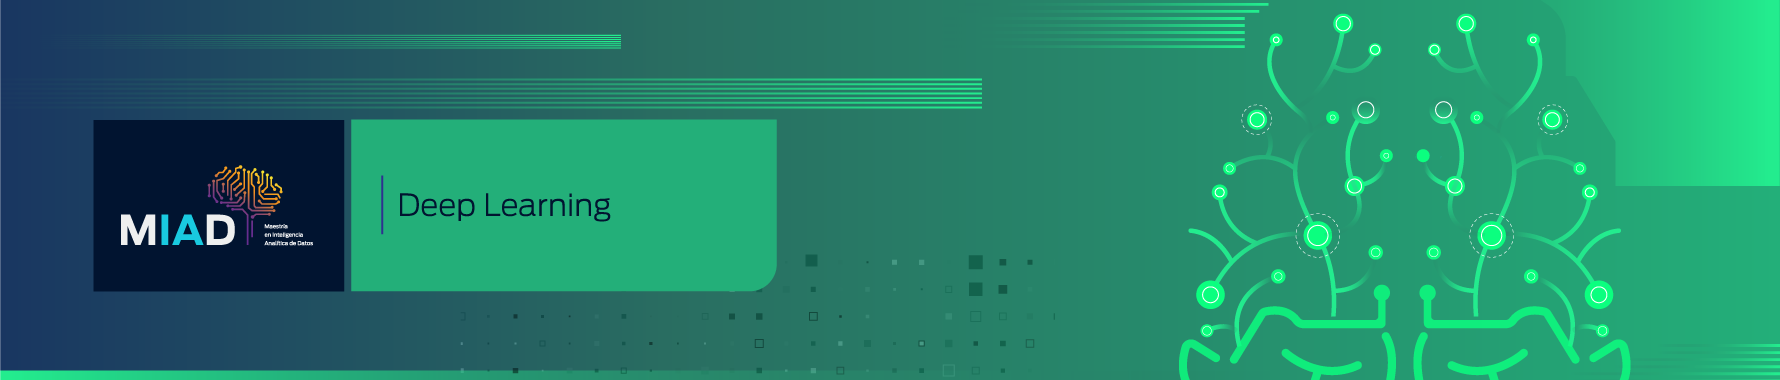

# Estrategias de implementación

## Redes neuronales usando Keras: Implementación en contexto real usando Keras

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Estimación de red neuronal con múltiples capas" se propuso una implementación manual de redes neuronales usando librerías básicas de python como lo son *pandas* y *numpy*. *Google* desarrolló un *API* para el aprendizaje automático cuyo nombre es *"Keras"*, esta es escrita en *python* y es utilizada para hacer implementaciones de redes neuronales simples.

Así, en este *notebook* se pretende evaluar el uso de *keras* al aplicar una red neuronal en un contexto real. 

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios a evaluar

Los criterios que se evaluarán son:

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [30 puntos]

Estimación de un modelo utilizando redes neuronales: Se estima el modelo usando una red neuronal, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado [30 puntos]

Elección del mejor modelo: Se elige la mejor combinación de hiperparámetros de acuerdo a los resultados obtenidos y justifica adecuadamente la selección. [40 puntos]


#### Problema

Un *manager* de un banco manifiesta preocupación porque los clientes están renunciando a las tarjetas de crédito. Este cuenta con los datos disponibles en 
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers a cerca de 10000 clientes, si tiene productos activos o no (*"Attrition flag"*), en función de variables tales como edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc.

Ustedes deben proponer el algoritmo para hacer la clasificación de los clientes con una red neuronal.

Tengan en cuenta que, para resolver los puntos de esta actividad, únicamente deben considerar las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


### Librerías a importar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

### 1. Análisis preliminar de variables [30 puntos]

Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

### Preparación de la data

In [8]:
import pandas as pd
import numpy as np

import pandas as pd
url = "https://raw.githubusercontent.com/Flacko-420/BankChurnersProject/main/BankChurners.csv"
df = pd.read_csv(url)

# Variable respuesta binaria: 1 = Attrited, 0 = Existing
df["y"] = (df["Attrition_Flag"] == "Attrited Customer").astype(int)

# Eliminar columnas NO permitidas
drop_cols = ["CLIENTNUM", "Attrition_Flag","Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]
drop_cols += [c for c in df.columns if c.startswith("Naive_Bayes_Classifier")]

df2 = df.drop(columns=[c for c in drop_cols if c in df.columns], errors="ignore")

# Dejar SOLO con variables numéricas
df_num = df2.select_dtypes(include=[np.number]).copy()

# Eliminar observaciones con faltantes
df_num = df_num.dropna()

# Separar X e y
X = df_num.drop(columns=["y"])
y = df_num["y"]

print("Dimensión final:", df_num.shape)
print("Predictores usados:", list(X.columns))

Dimensión final: (10127, 15)
Predictores usados: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


### Distribución de la variable objetivo

Conteos:
 0    8500
1    1627
Name: y, dtype: int64

Proporciones:
 0    0.83934
1    0.16066
Name: y, dtype: float64


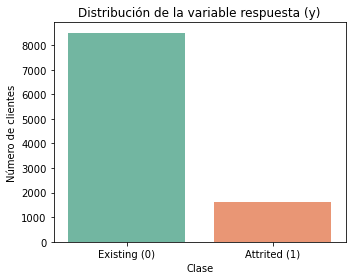

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = y.value_counts().sort_index()
props = y.value_counts(normalize=True).sort_index()

print("Conteos:\n", counts)
print("\nProporciones:\n", props)

plt.figure(figsize=(5,4))
sns.barplot(x=counts.index, y=counts.values, palette="Set2")
plt.xticks([0,1], ["Existing (0)", "Attrited (1)"])
plt.title("Distribución de la variable respuesta (y)")
plt.ylabel("Número de clientes")
plt.xlabel("Clase")
plt.tight_layout()
plt.show()

### Estadística de los predictores

In [16]:
desc = X.describe().T
print("=== Estadísticas descriptivas ===")
print(desc)

=== Estadísticas descriptivas ===
                            count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.5

### Estadística de los predictores

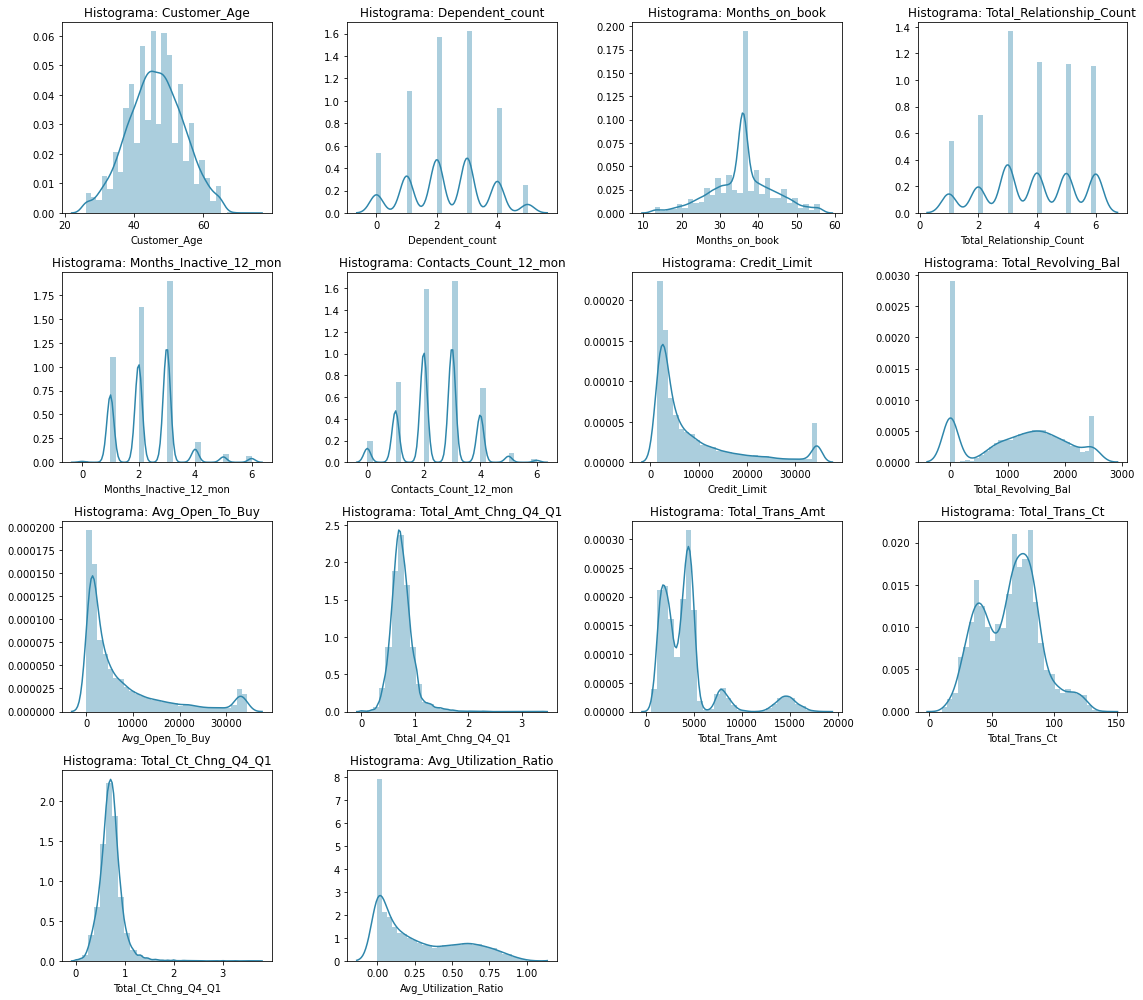

In [18]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

cols = X.columns.tolist()
n = len(cols)
ncols = 4
nrows = math.ceil(n / ncols)

plt.figure(figsize=(16, 3.5*nrows))
for i, c in enumerate(cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.distplot(X[c].dropna(), bins=30, kde=True, color="#2E86AB")  # <- cambio aquí
    plt.title(f"Histograma: {c}")
plt.tight_layout()
plt.show()

### Correlagrama de los predictores

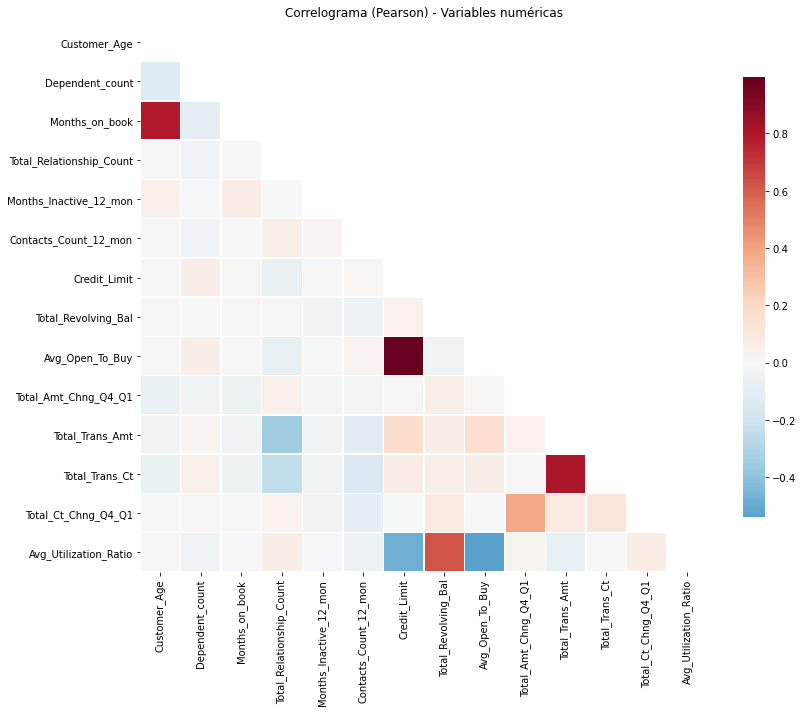

Top 15 correlaciones absolutas entre predictores:
Avg_Open_To_Buy        Credit_Limit                0.995981
Total_Trans_Ct         Total_Trans_Amt             0.807192
Months_on_book         Customer_Age                0.788912
Avg_Utilization_Ratio  Total_Revolving_Bal         0.624022
                       Avg_Open_To_Buy             0.538808
                       Credit_Limit                0.482965
Total_Ct_Chng_Q4_Q1    Total_Amt_Chng_Q4_Q1        0.384189
Total_Trans_Amt        Total_Relationship_Count    0.347229
Total_Trans_Ct         Total_Relationship_Count    0.241891
Total_Trans_Amt        Credit_Limit                0.171730
                       Avg_Open_To_Buy             0.165923
Total_Trans_Ct         Contacts_Count_12_mon       0.152213
Dependent_count        Customer_Age                0.122254
Total_Trans_Amt        Contacts_Count_12_mon       0.112774
Total_Ct_Chng_Q4_Q1    Total_Trans_Ct              0.112324
dtype: float64


In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr(method="pearson")

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="RdBu_r", center=0, linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title("Correlograma (Pearson) - Variables numéricas")
plt.tight_layout()
plt.show()

# Top correlaciones absolutas
corr_abs = corr.abs()
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
top_pairs = upper.unstack().dropna().sort_values(ascending=False).head(15)
print("Top 15 correlaciones absolutas entre predictores:")
print(top_pairs)


### Análisis y conclusiones
* Tamaño y balance de clases:
Total registros: 10,127 (después de eliminar categóricas y aplicar dropna, quedaron todas las filas, lo cual indica que en los predictores numéricos usados no había faltantes relevantes).
Clases:
y=0 (Existing): 8,500 → 83.934%
y=1 (Attrited): 1,627 → 16.066%

* La variable objetivo presenta un desbalance moderado: aproximadamente 16% de los clientes han cancelado su tarjeta (churn) frente a 84% que permanecen activos. Esto implica que métricas globales como la exactitud (accuracy) pueden ser engañosas y que el modelado debe priorizar métricas sensibles a la clase minoritaria, como Recall, F1-score o AUC-PR.
* La alta dispersión y sesgo observados en los predictores financieros y en los indicadores de uso implican que el escalamiento de variables es imprescindible antes de entrenar una red neuronal. De no hacerlo, las variables con mayor magnitud podrían dominar el proceso de aprendizaje y degradar el desempeño del modelo.
* El correlograma revela correlaciones fuertes y coherentes desde el punto de vista del negocio, como: Credit_Limit con Avg_Open_To_Buy (correlación positiva alta). Total_Trans_Amt con Total_Trans_Ct (clientes que realizan más transacciones tienden a gastar más). Total_Revolving_Bal con Avg_Utilization_Ratio (relación directa entre saldo y utilización de crédito.
* El conjunto de datos es adecuado para un enfoque predictivo con redes neuronales, por lo que consideramos utilizar escalamiento de variables, la regularización y el desbalance de la variable objetivo.

### 2. Estimación del modelo usando una red neuronal con keras [30 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test con hiperparámetros de su selección.

Epoch 1/150
8101/8101 [==============================] - 0s 35us/step - loss: 62.7632 - accuracy: 0.7713
Epoch 2/150
8101/8101 [==============================] - 0s 18us/step - loss: 5.4064 - accuracy: 0.7925
Epoch 3/150
8101/8101 [==============================] - 0s 14us/step - loss: 5.0976 - accuracy: 0.7926
Epoch 4/150
8101/8101 [==============================] - 0s 14us/step - loss: 4.7415 - accuracy: 0.7937
Epoch 5/150
8101/8101 [==============================] - 0s 14us/step - loss: 2.8041 - accuracy: 0.7969
Epoch 6/150
8101/8101 [==============================] - 0s 14us/step - loss: 3.0434 - accuracy: 0.8076
Epoch 7/150
8101/8101 [==============================] - 0s 13us/step - loss: 3.6460 - accuracy: 0.7998
Epoch 8/150
8101/8101 [==============================] - 0s 13us/step - loss: 3.8285 - accuracy: 0.7995
Epoch 9/150
8101/8101 [==============================] - 0s 13us/step - loss: 3.6424 - accuracy: 0.7982
Epoch 10/150
8101/8101 [==============================] - 0s 13

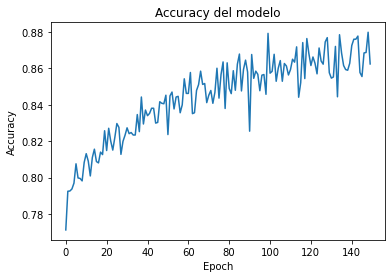

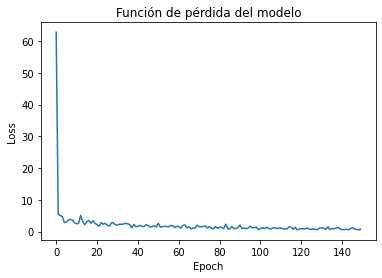

Accuracy Train: 87.06
Accuracy Test: 86.43
Accuracy: 0.8642645607107601
Precision: 0.8823529411764706
Matriz de confusión:
 [[1691    8]
 [ 267   60]]
AUC: 0.8358487543491134


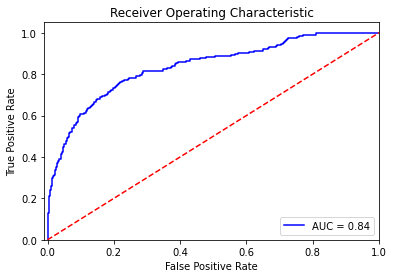

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


dataset = pd.concat([X, y], axis=1).to_numpy()


# ============================================================
# TRAIN / TEST
# ============================================================
# X: columnas 0 a (p-1), y: última columna
p = X.shape[1]  # número de predictores
X_train, X_test, y_train, y_test = train_test_split(
    dataset[:, 0:p], dataset[:, p], test_size=0.20, random_state=42)


# ============================================================
# MODELO
# ============================================================
# Hiperparámetros elegidos
model = Sequential()
model.add(Dense(32, input_dim=p, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# ============================================================
# COMPILACIÓN
# ============================================================
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ============================================================
# ENTRENAMIENTO
# ============================================================
history = model.fit(X_train, y_train, epochs=150, batch_size=64, verbose=1)

# ============================================================
# GRÁFICAS
# ============================================================
plt.plot(history.history['accuracy'])
plt.title('Accuracy del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Función de pérdida del modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# ============================================================
# EVALUACIÓN TRAIN y TEST 
# ============================================================
_, acc_train = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy Train: %.2f' % (acc_train * 100))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy Test: %.2f' % (test_acc * 100))

# ============================================================
# PREDICCIÓN + MÉTRICAS
# ============================================================
predicciones = model.predict(X_test, verbose=0)

# Clasificación con umbral 0.5 
y_pred = [round(x[0]) for x in predicciones]

print("Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred))
print("Precision:", precision_score(y_true=y_test, y_pred=y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_true=y_test, y_pred=y_pred))

# AUC + curva ROC 
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicciones, pos_label=1)
AUC = metrics.auc(fpr, tpr)
print("AUC:", AUC)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % AUC)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

El modelo MLP entrenado con Keras presenta accuracy de 86.43% en test y AUC-ROC de 0.836, indicando una capacidad discriminante razonable. Sin embargo, la matriz de confusión evidencia un comportamiento conservador: precision alta (0.882) pero recall bajo para la clase churn (0.183), con 267 falsos negativos frente a 60 verdaderos positivos. Dado el desbalance del problema (≈16% churn), el accuracy no refleja adecuadamente el desempeño sobre la clase minoritaria. Estos resultados sugieren que la red ordena bien los casos (AUC), pero el umbral 0.5 reduce la detección de churners

### 3. Elección del mejor modelo [40 puntos]

Ahora construyan una función que reciba por parámetro una lista de número de capas a utilizar,  números de neuronas por capa, así como funciones de activación a utilizar.

Dicha función debe entrenar el modelo con los datos de entrenamiento, evaluar con los datos de prueba para cada una de las combinaciones de hiperparámetros y encontrar cuál es la mejor combinación de hiperprámetros.  

Una vez hecho este procedimiento respondan a la siguiente pregunta:
 
¿Cómo argumenta que esta sea la selección óptima de hiperparámetros?

### Desarrolo de la función

In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense


def elegir_mejor_modelo_auc(
    X_train, y_train, X_test, y_test,
    lista_capas,                 # ej: [1,2,3]
    lista_neuronas_por_capa,     # ej: [[32], [64,32], [128,64,32], ...]
    lista_activaciones,          # ej: ['relu','tanh']
    epochs=100,
    batch_size=64,
    verbose_fit=0
):
    resultados = []
    best_auc = -np.inf
    best_config = None
    best_model = None

    for num_capas in lista_capas:
        for neuronas in lista_neuronas_por_capa:
            for act in lista_activaciones:

                # Validación: la arquitectura debe coincidir con num_capas
                if len(neuronas) != num_capas:
                    continue

                # ============================================================
                # 1) CREACIÓN DEL MODELO (Sequential + Dense) 
                # ============================================================
                model = Sequential()
                model.add(Dense(neuronas[0], input_dim=X_train.shape[1], activation=act))

                for i in range(1, num_capas):
                    model.add(Dense(neuronas[i], activation=act))

                # Salida binaria sigmoide 
                
                model.add(Dense(1, activation='sigmoid'))

                # ============================================================
                # 2) COMPILACIÓN (BCE + Adam + accuracy)
                # ============================================================
                model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

                # ============================================================
                # 3) ENTRENAMIENTO 
                # ============================================================
                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose_fit)

                # ============================================================
                # 4) EVALUACIÓN TEST 
                # ============================================================
                test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

                # ============================================================
                # 5) PREDICCIÓN + UMBRAL 
                # ============================================================
                probs = model.predict(X_test, verbose=0)   # probabilidades
                y_pred = [round(x[0]) for x in probs]      # clases con umbral 0.5

                # Métricas clásicas
                acc  = accuracy_score(y_test, y_pred)
                prec = precision_score(y_test, y_pred, zero_division=0)
                rec  = recall_score(y_test, y_pred, zero_division=0)
                f1   = f1_score(y_test, y_pred, zero_division=0)
                cm   = confusion_matrix(y_test, y_pred)

                # AUC ROC (como en S2LSC2) [1](https://ecopetrol-my.sharepoint.com/personal/juan_gutierrez_ecopetrol_com_co/Documents/Archivos%20de%20chat%20de%20Microsoft%C2%A0Copilot/S2LSC2.py)
                fpr, tpr, thr = metrics.roc_curve(y_test, probs, pos_label=1)
                auc = metrics.auc(fpr, tpr)

                resultados.append({
                    "capas": num_capas,
                    "neuronas_por_capa": str(neuronas),
                    "activacion": act,
                    "accuracy": acc,
                    "precision": prec,
                    "recall": rec,
                    "f1": f1,
                    "auc": auc,
                    "tn": cm[0,0], "fp": cm[0,1], "fn": cm[1,0], "tp": cm[1,1]
                })

                # Selección del mejor por AUC
                if auc > best_auc:
                    best_auc = auc
                    best_config = (num_capas, neuronas, act)
                    best_model = model

    results_df = pd.DataFrame(resultados).sort_values(by="auc", ascending=False).reset_index(drop=True)
    return results_df, best_config, best_model

### Aplicación de la función

In [33]:
lista_capas = [1, 2, 3]

# Lista por capa (cada sublista define la arquitectura completa)
lista_neuronas_por_capa = [
    [32],
    [64],
    [64, 32],
    [32, 16],
    [128, 64],
    [128, 64, 32],
    [64, 32, 16]
]

lista_activaciones = ['relu', 'tanh']

results_df, best_cfg, best_model = elegir_mejor_modelo_auc(
    X_train, y_train, X_test, y_test,
    lista_capas=lista_capas,
    lista_neuronas_por_capa=lista_neuronas_por_capa,
    lista_activaciones=lista_activaciones,
    epochs=100,
    batch_size=64,
    verbose_fit=0
)

print("✅ Mejor configuración (capas, neuronas por capa, activación):", best_cfg)
print("\nTop 10 por AUC:")
print(results_df.head(10))

✅ Mejor configuración (capas, neuronas por capa, activación): (2, [32, 16], 'relu')

Top 10 por AUC:
   capas neuronas_por_capa activacion  accuracy  precision    recall  \
0      2          [32, 16]       relu  0.887463   0.832215  0.379205   
1      3      [64, 32, 16]       relu  0.875617   0.820513  0.293578   
2      3     [128, 64, 32]       relu  0.868213   0.788462  0.250765   
3      1              [64]       relu  0.878085   0.750000  0.366972   
4      2         [128, 64]       relu  0.880059   0.800000  0.342508   
5      2          [64, 32]       relu  0.845015   0.521886  0.474006   
6      1              [32]       relu  0.872655   0.701754  0.366972   
7      3      [64, 32, 16]       tanh  0.843534   0.553191  0.159021   
8      3     [128, 64, 32]       tanh  0.845508   0.597222  0.131498   
9      2          [64, 32]       tanh  0.840573   0.562500  0.055046   

         f1       auc    tn   fp   fn   tp  
0  0.521008  0.872206  1674   25  203  124  
1  0.432432  0.8

### Análisis y conclusiones

* Consideramos que la combinación optima de hiperparámetros es la que maximiza el AUC-ROC en el conjunto de prueba, porque el AUC resume la capacidad del modelo para discriminar entre las clases usando las probabilidades predichas y no depende de un único umbral de clasificación. Este criterio es especialmente útil en clasificación binaria

* El modelo seleccionado con arquitectura [32,16] y activación ReLU es óptimo dentro del espacio de búsqueda evaluado, ya que maximiza el AUC-ROC en el conjunto de prueba (0.8722 frente a 0.8358 del modelo base), evidenciando una mayor capacidad de discriminación entre clientes que abandonan y los que permanecen. Esta mejora se refleja también en un aumento significativo de verdaderos positivos (60 → 124) y una reducción de falsos negativos (267 → 203), confirmando que el modelo captura mejor la señal de churn.